In [24]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

c = 3e8
G = 6.67e-11
pc2m = 3.086e16
solarmass = 2e30

In [8]:
import lal
import lalsimulation as lalsim
from pycbc import types, fft, waveform

In [19]:
# Get a frequency domain waveform
mass1 = 10
mass2 = 10
distance = 100
sptilde, sctilde = waveform. get_fd_waveform(approximant="TaylorF2",
                             mass1=10, mass2=10, delta_f=1.0/4, f_lower=20,distance=distance)

/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


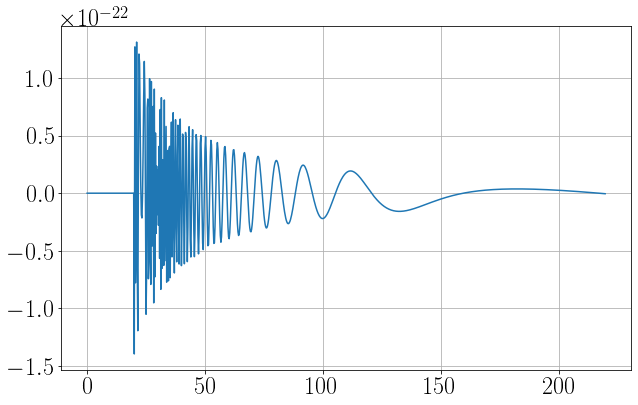

In [20]:
plt.plot(sptilde.sample_frequencies,sptilde.data.data)

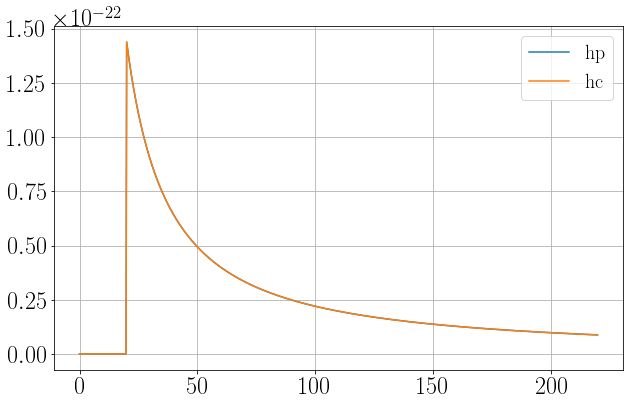

In [21]:
plt.plot(sptilde.sample_frequencies,np.abs(sptilde.data.data),label='hp')
plt.plot(sctilde.sample_frequencies,np.abs(sctilde.data.data),label='hc')
plt.legend()

In [22]:
dEdf = 16/5*np.pi**2*c**3/G*sptilde.sample_frequencies**2*(distance*1e6*pc2m)**2*(np.abs(sptilde.data.data))**2

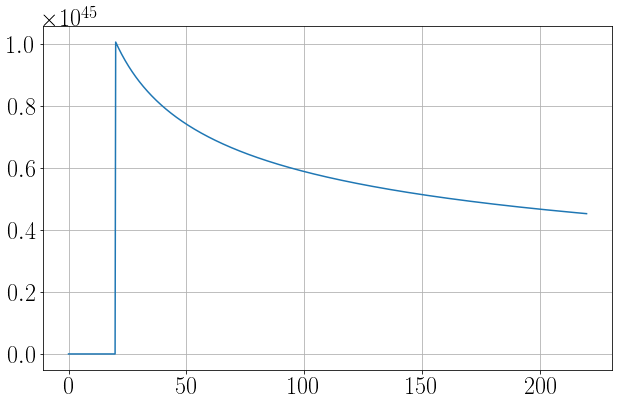

In [23]:
plt.plot(sptilde.sample_frequencies,dEdf)

In [26]:
chirpmass = (mass1*mass2)**(3/5)/(mass1+mass2)**(1/5)
dEdfanalytic = (G*np.pi)**(2/3)/3*(chirpmass*solarmass)**(5/3)*sptilde.sample_frequencies**(-1/3)

/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/PyCBC-0c424d-py3.8-macosx-10.14-x86_64.egg/pycbc/types/array.py:420: RuntimeWarning: divide by zero encountered in power
  return self._data ** other


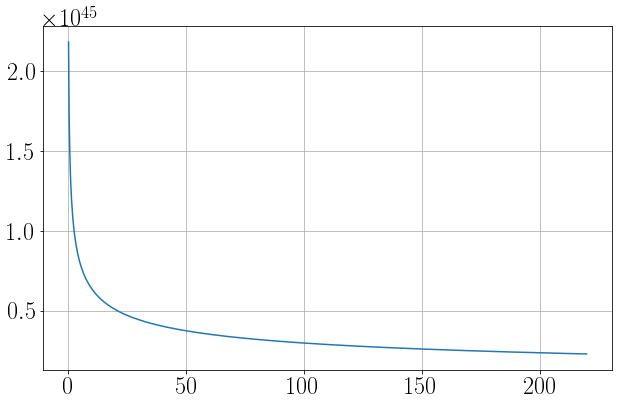

In [27]:
plt.plot(sptilde.sample_frequencies,dEdfanalytic)

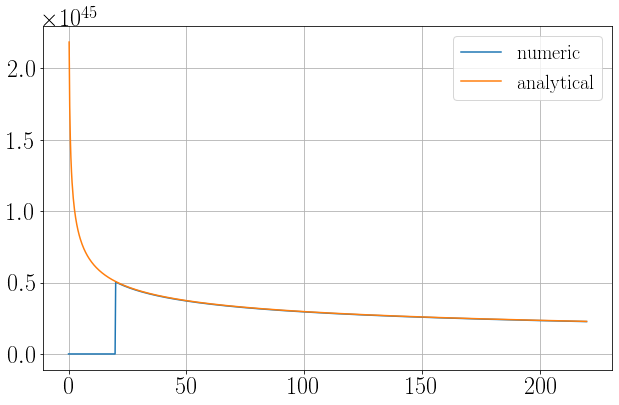

In [30]:
plt.plot(sptilde.sample_frequencies,dEdf/2,label='numeric')
plt.plot(sptilde.sample_frequencies,dEdfanalytic,label='analytical')
plt.legend()